In [ ]:
import numpy as np

# Обработка данных
import pandas as pd

# Нормализация масштабирования
from sklearn.preprocessing import StandardScaler

# Графическое представление
import seaborn as sns
import matplotlib.pyplot as plt

# Разделение данных
from sklearn.model_selection import train_test_split

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LayerNormalization
from keras.callbacks import EarlyStopping

#Dataset Inputs
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(axis = 1, columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

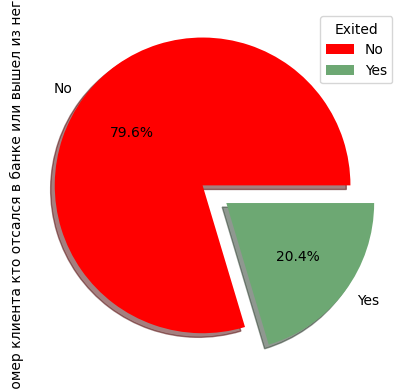

In [ ]:
colourScheme = ['#ff0000', '#6da873']

all_no = df['Exited'].value_counts()[0]
all_yes = df['Exited'].value_counts()[1]

all_exited = [all_no, all_yes]

plt.pie(all_exited, colors = colourScheme, labels = ['No', 'Yes'],explode = [0.1, 0.1], shadow = True, autopct='%1.1f%%')
plt.ylabel('Номер клиента кто отсался в банке или вышел из него')
plt.legend(title = 'Exited')
plt.show()

<ipython-input-14-dcebbd8031d1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


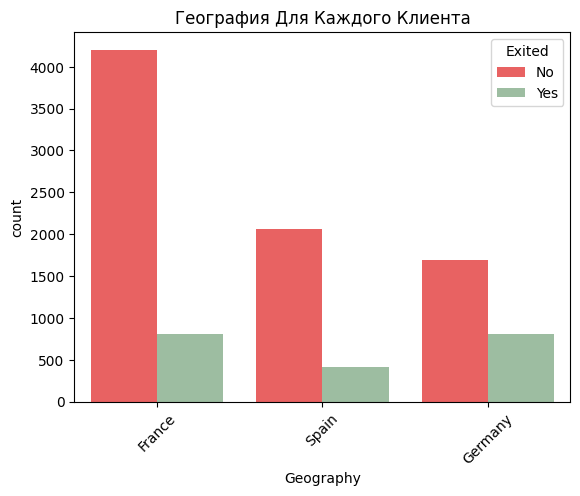

In [ ]:
colourScheme = ['#ff0000', '#6da873']

ax = sns.countplot(x=df['Geography'],
              hue=df['Exited'],
              palette = colourScheme,
              alpha = 0.7)
plt.title('География Для Каждого Клиента')
plt.xlabel('Geography')
plt.legend(title='Exited', loc='upper right', labels=['No', 'Yes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<ipython-input-15-126f042a0012>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


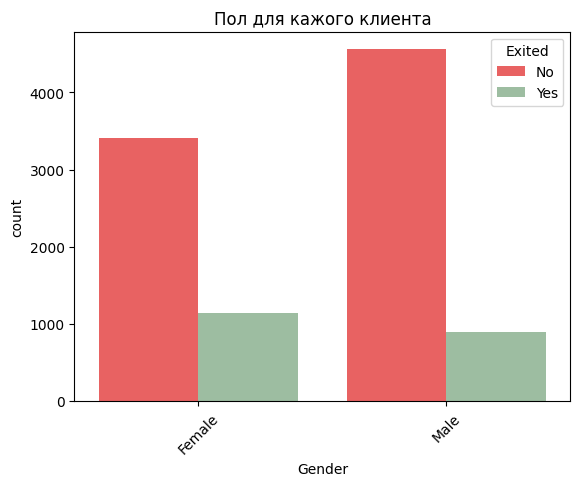

In [ ]:
colourScheme = ['#ff0000', '#6da873']

ax = sns.countplot(x=df['Gender'],
              hue=df['Exited'],
              palette = colourScheme,
              alpha = 0.7)
plt.title('Пол для кажого клиента')
plt.xlabel('Gender')
plt.legend(title='Exited', loc='upper right', labels=['No', 'Yes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
geo_map = {'France' : 0, 'Germany' : 1, 'Spain' : 2}
gender_map = {'Female' : 0, 'Male' : 1}
df['Geography'] = df['Geography'].map(geo_map)
df['Gender'] = df['Gender'].map(gender_map)

In [ ]:
df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
X = df.drop('Exited', axis = 1)
y = df['Exited']



# Разделение набора данных на X и y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Функция построения модели
def build_model():
    model = Sequential()
    model.add(Dense(1000, input_shape=(10,),name='input', activation='relu'))

    dropOutRate = 0.25
    model.add(Dropout(rate = dropOutRate))
    model.add(LayerNormalization())

    model.add(Dense(1000, kernel_initializer = 'normal', name='hiddenLayer1', activation='relu'))

    model.add(Dropout(rate = dropOutRate))
    model.add(LayerNormalization())

    model.add(Dense(1000, kernel_initializer = 'normal', name='hiddenLayer2', activation='relu'))

    model.add(Dropout(rate = dropOutRate))
    model.add(LayerNormalization())

    model.add(Dense(1000, kernel_initializer = 'normal', name='hiddenLayer3', activation='relu'))

    model.add(Dropout(rate = dropOutRate))
    model.add(LayerNormalization())

    model.add(Dense(1, kernel_initializer = 'normal', name='output',activation='sigmoid'))

    adam = Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 1000)              11000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 layer_normalization (Layer  (None, 1000)              2000      
 Normalization)                                                  
                                                                 
 hiddenLayer1 (Dense)        (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 layer_normalization_1 (Lay  (None, 1000)              2000      
 erNormalization)                                       

In [ ]:
#Обучение модели
es = EarlyStopping(monitor='val_loss',patience=10)
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, callbacks=[es])

Epoch 1/20
250/250 [==============================] - 18s 63ms/step - loss: 0.4930 - accuracy: 0.8064 - val_loss: 0.3803 - val_accuracy: 0.8540
Epoch 2/20
250/250 [==============================] - 12s 49ms/step - loss: 0.3738 - accuracy: 0.8434 - val_loss: 0.3692 - val_accuracy: 0.8525
Epoch 3/20
250/250 [==============================] - 14s 56ms/step - loss: 0.3632 - accuracy: 0.8487 - val_loss: 0.3472 - val_accuracy: 0.8620
Epoch 4/20
250/250 [==============================] - 12s 50ms/step - loss: 0.3550 - accuracy: 0.8550 - val_loss: 0.3768 - val_accuracy: 0.8570
Epoch 5/20
250/250 [==============================] - 13s 50ms/step - loss: 0.3495 - accuracy: 0.8556 - val_loss: 0.3688 - val_accuracy: 0.8595
Epoch 6/20
250/250 [==============================] - 13s 50ms/step - loss: 0.3472 - accuracy: 0.8612 - val_loss: 0.3718 - val_accuracy: 0.8635
Epoch 7/20
250/250 [==============================] - 13s 51ms/step - loss: 0.3472 - accuracy: 0.8558 - val_loss: 0.3683 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 10ms/step - loss: 0.3597 - accuracy: 0.8565


[0.35968369245529175, 0.8565000295639038]